# Data Visualization with matplotlib and seaborn

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Simple plot
continous vs continous variable

Text(0.5, 1.0, 'Relationship between variables X and Y')

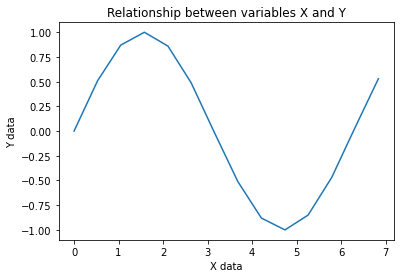

In [3]:
x = np.array([ 0, 0.53, 1.05, 1.58, 2.11, 2.63, 3.16, 3.68, 4.21,  
        4.74, 5.26, 5.79, 6.32, 6.84])  
y = np.array([ 0, 0.51, 0.87, 1. , 0.86, 0.49, -0.02, -0.51, -0.88,  
        -1. , -0.85, -0.47, 0.04, 0.53])

### Creating a figure to plot the graph.  
fig, ax = plt.subplots()  
ax.plot(x, y)  
ax.set_xlabel('X data')  
ax.set_ylabel('Y data')  
ax.set_title('Relationship between variables X and Y')  


## Histogram

Text(0.5, 1.0, 'Distribution of the variable x')

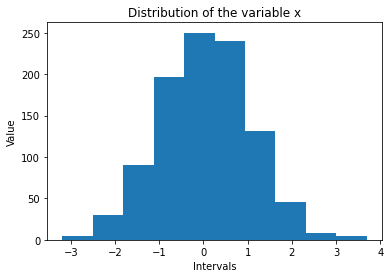

In [8]:
x= np.random.randn(1000)
plt.hist(x,bins=10)  
plt.xlabel('Intervals')  
plt.ylabel('Value')  
plt.title('Distribution of the variable x')  

## Kernel Density Function

Before we dive into understanding KDE, let’s understand what parametric and non-parametric data are.
Parametric Data: When the data is assumed to have been drawn from a particular distribution and some parametric test can be applied to it
Non-Parametric Data: When we have no knowledge about the population and the underlying distribution

Kernel Density Function is the non-parametric way of representing the probability distribution function of a random variable. It is used when the parametric distribution of the data doesn’t make much sense, and you want to avoid making assumptions about the data.

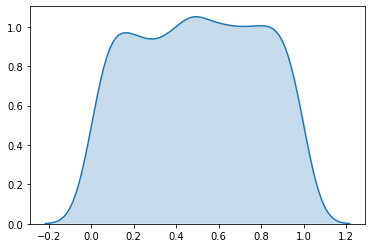

In [10]:
x=np.random.rand(1000)
sns.kdeplot(x,shade=True)

- Distplot combines the function of the histogram and the KDE plot into one figure.

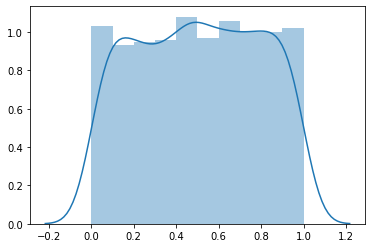

In [12]:
sns.distplot(x,bins=10)

## Scatter Plot
Scatter plots are used to determine the relationship between two variables.
They show how much one variable is affected by another. It is the most commonly used data visualization technique and helps in drawing useful insights when comparing two variables.
The relationship between two variables is called correlation.

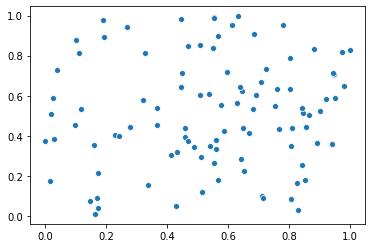

In [13]:
x=np.random.rand(100)
y=np.random.rand(100)
sns.scatterplot(x,y)

## Joint Plot
Jointplot is seaborn library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

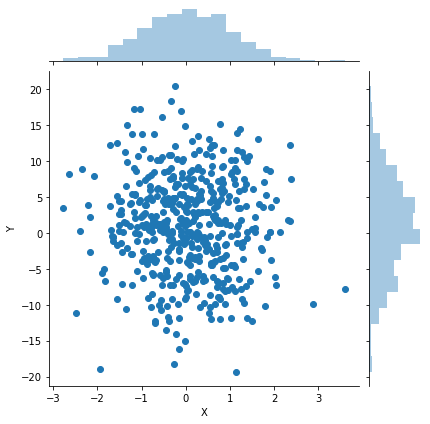

In [17]:
### Defining the data.   
mean, covar = [0, 1], [[1, 0,], [0, 50]]  
### Drawing random samples from a multivariate normal distribution.  
### Two random variables are created, each containing 500 values, with the given mean and covariance.  
data = np.random.multivariate_normal(mean, covar, 500)  
### Storing the variables in a dataframe.  
df = pd.DataFrame(data=data, columns=['X', 'Y'])  

### Joint plot between X and Y  
sns.jointplot(df.X, df.Y, kind='scatter')  
plt.show()

## Pairplot

We can use scatter plot to plot the relationship between two variables. But what if the dataset has more than two variables (which is quite often the case), it can be a tedious task to visualize the relationship between each variable with the other variables.

The seaborn pairplot function does the same thing for us and in just one line of code. It is used to plot multiple pairwise bivariate (two variable) distribution in a dataset. It creates a matrix and plots the relationship for each pair of columns. It also draws a univariate distribution for each variable on the diagonal axes.

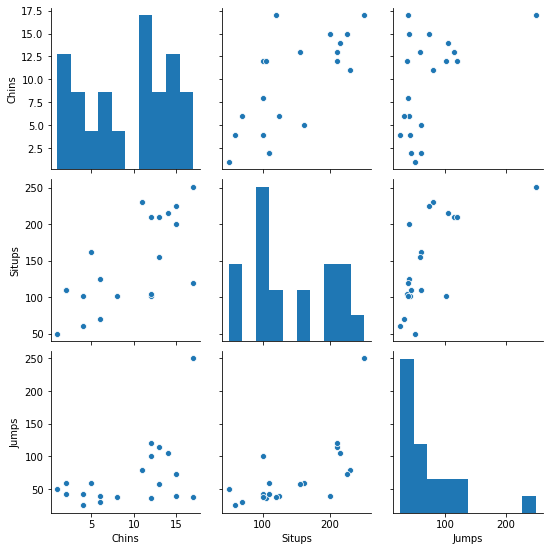

In [20]:
### Loading a dataset from the sklearn toy datasets  
from sklearn.datasets import load_linnerud  
### Loading the data  
linnerud_data = load_linnerud()  
### Extracting the column data  
data = linnerud_data.data  
 
### Creating a dataframe  
data = pd.DataFrame(data=data, columns=linnerud_data.feature_names)  
### Plotting a pairplot  
sns.pairplot(data=data)

## Bar graph 

In [22]:
# Since the dataset doesn't contain the column header, we need to specify it manually.   
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'annual-income']  
 
# Importing dataset   
data = pd.read_csv('adult.data', names=cols)  
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,annual-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


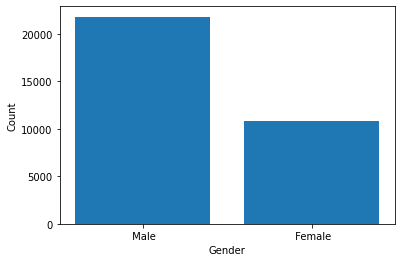

In [23]:
# Let's start by visualizing the distribution of gender in the dataset.  
fig, ax = plt.subplots()  
x = data.gender.unique()  
# Counting 'Males' and 'Females' in the dataset  
y = data.gender.value_counts()  
# Plotting the bar graph  
ax.bar(x, y)  
ax.set_xlabel('Gender')  
ax.set_ylabel('Count')  
plt.show()  
 

## Countplot
This is a seaborn-specific function which is used to plot the count or frequency distribution of each unique observation in the categorical variable. It is similar to a histogram over a categorical rather than quantitative variable.

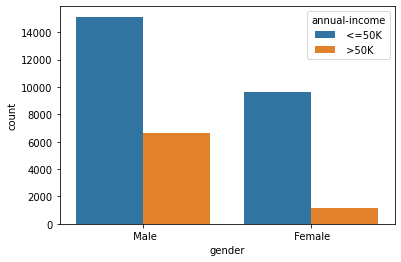

In [26]:
sns.countplot(data.gender,hue=data['annual-income'])

## Box plot
Box plots are widely used in data visualization. Box plots, also known as box and whisker plots are used to visualize variations and compare different categories in a given set of data. It doesn’t display the distribution in detail but is useful in detecting whether a distribution is skewed and detect outliers in the data. In a box and whisker plot:

- the box spans the interquartile range
- a vertical line inside the box represents the median
- two lines outside the box, the whiskers, extending to the highest and the lowest observations represent the possible outliers in the data.

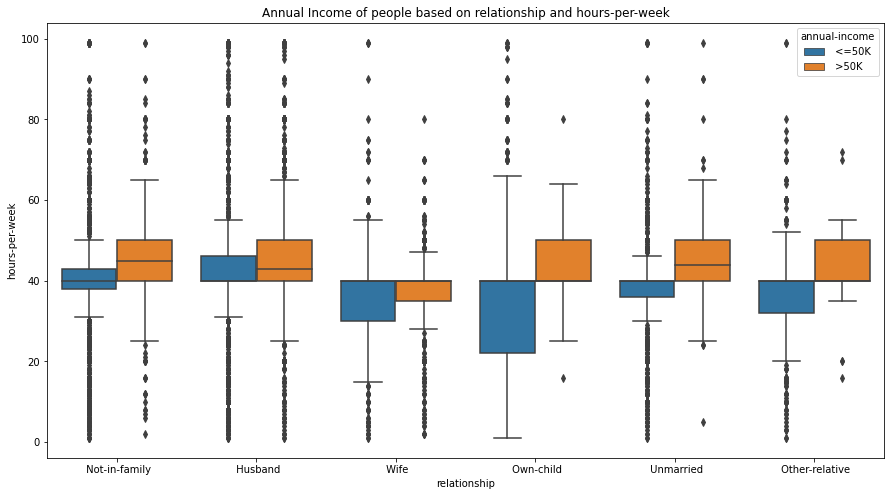

In [27]:

# Creating a box plot  
fig, ax = plt.subplots(figsize=(15, 8))  
sns.boxplot(x='relationship', y='hours-per-week', hue='annual-income', data=data, ax=ax)  
ax.set_title('Annual Income of people based on relationship and hours-per-week')  
plt.show()  

## Strip plot
Strip plot is a data analysis technique used to plot the sorted values of a variable along one axis. It is used to represent the distribution of a continuous variable with respect to the different levels of a categorical variable. For example, a strip plot can be used to show the distribution of the variable ‘gender’, i.e., males and females, with respect to the number of hours they work each week.

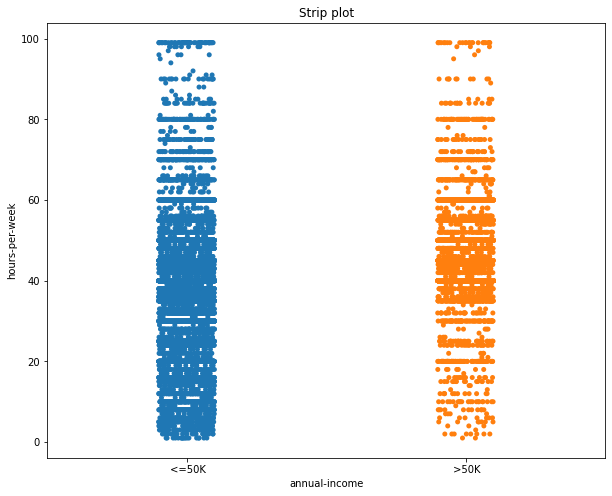

In [28]:
# Using Strip plot to visualize the data.  
fig, ax= plt.subplots(figsize=(10, 8))  
sns.stripplot(data['annual-income'], data['hours-per-week'], jitter=True, ax=ax)  
ax.set_title('Strip plot')  
plt.show()  

## Violin plot

Sometimes the mean and median may not be enough to understand the distribution of the variable in the dataset. The data may be clustered around the maximum or minimum with nothing in the middle. Box plots are a great way to summarize the statistical information related to the distribution of the data (through the interquartile range, mean, median), but they cannot be used to visualize the variations in the distributions.

A violin plot is a combination of a box plot and kernel density function (KDE, described in Part I of this blog series) which can be used to visualize the probability distribution of the data. Violin plots can be interpreted as follows:

- The outer layer shows the probability distribution of the data points and indicates 95% confidence interval. The thicker the layer, the higher the probability of the data points, and vice-versa.
- The second layer shows a box plot indicating the interquartile range.
- The third layer, or the dot, indicates the median of the data.

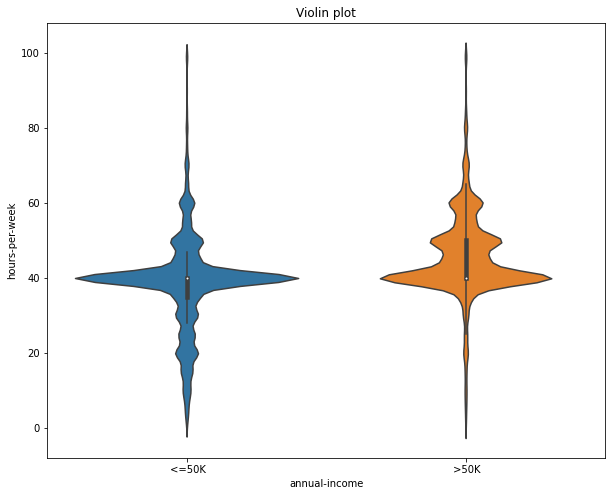

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))  
sns.violinplot(x='annual-income', y='hours-per-week', data=data, ax=ax)  
ax.set_title('Violin plot')  
plt.show()  
 

## Heatmaps
A heat map(or heatmap) is a two-dimensional graphical representation of the data which uses colour to represent data points on the graph. It is useful in understanding underlying relationships between data values that would be much harder to understand if presented numerically in a table/ matrix.

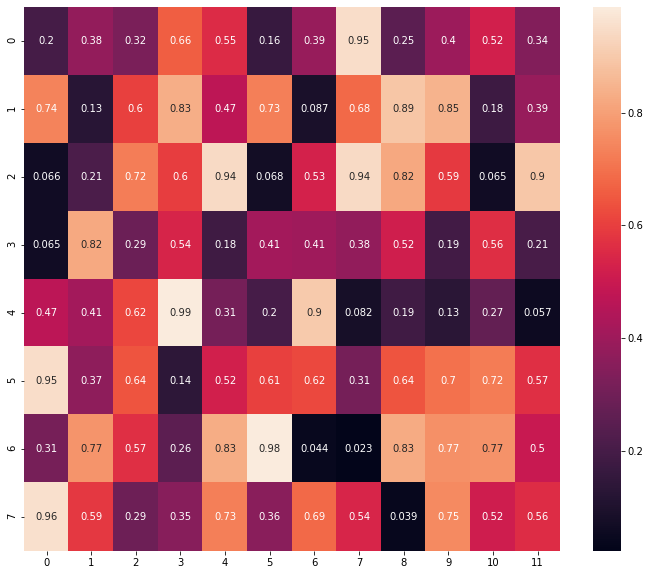

In [34]:

### We can create a heatmap by simply using the seaborn library.
fig, ax = plt.subplots(figsize=(12, 10)) 
sample_data = np.random.rand(8, 12)  
ax = sns.heatmap(sample_data,annot=True,ax=ax)  